In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


EXPLORATORY DATA ANALYSIS

In [3]:
df.shape

(38765, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
#checking for null values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

759

In [7]:
#dropping the duplicates value
df = df.drop_duplicates()
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


After dropping the duplicate, the number of rows dropped from 38765 to 38006 

In [8]:
#checking for duplicates
df.duplicated().sum()

0

UNIQUE ITEMS IN THE DATASET

In [9]:
pd.unique(df.itemDescription)

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [10]:
pd.unique(df.Member_number)

array([1808, 2552, 2300, ..., 3607, 4587, 2417], dtype=int64)

In [11]:
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

To get the number of unique values

In [12]:
df['itemDescription'].value_counts()

itemDescription
whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

To get the value count for Item description

In [13]:
df['Member_number'].value_counts()

Member_number
3180    35
3737    33
3050    32
2051    31
3915    30
        ..
4816     1
4029     1
4151     1
4565     1
2640     1
Name: count, Length: 3898, dtype: int64

To get the value count for Member Number

In [14]:
# Convert data types
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12476\3384730688.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [15]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

To check the data types

In [16]:
# Time-based analysis
# Extract relevant time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

To extract the Datetime inorder to separate the year, month and day

In [17]:
# Sales trends over time (e.g., monthly sales)
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Total Sales')
print("Monthly Sales:\n", monthly_sales)

Monthly Sales:
     Year  Month  Total Sales
0   2014      1         1499
1   2014      2         1409
2   2014      3         1384
3   2014      4         1533
4   2014      5         1595
5   2014      6         1551
6   2014      7         1557
7   2014      8         1556
8   2014      9         1455
9   2014     10         1576
10  2014     11         1457
11  2014     12         1453
12  2015      1         1751
13  2015      2         1517
14  2015      3         1671
15  2015      4         1661
16  2015      5         1753
17  2015      6         1656
18  2015      7         1683
19  2015      8         1875
20  2015      9         1547
21  2015     10         1627
22  2015     11         1736
23  2015     12         1504


To ascertain the Sales trend over time using Monthly sales

Note: The sales was just for two years (2014 and 2015)

In [18]:
# Item frequency
item_frequency = df['itemDescription'].value_counts().reset_index(name='Frequency').rename(columns={'index': 'Item'})
print("Item Frequency:\n", item_frequency)

Item Frequency:
            itemDescription  Frequency
0               whole milk       2363
1         other vegetables       1827
2               rolls/buns       1646
3                     soda       1453
4                   yogurt       1285
..                     ...        ...
162        rubbing alcohol          5
163                   bags          4
164         baby cosmetics          3
165        kitchen utensil          1
166  preservation products          1

[167 rows x 2 columns]


In [19]:
df['itemDescription'].value_counts()[:10]

itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64

Ten popular most sold Items

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


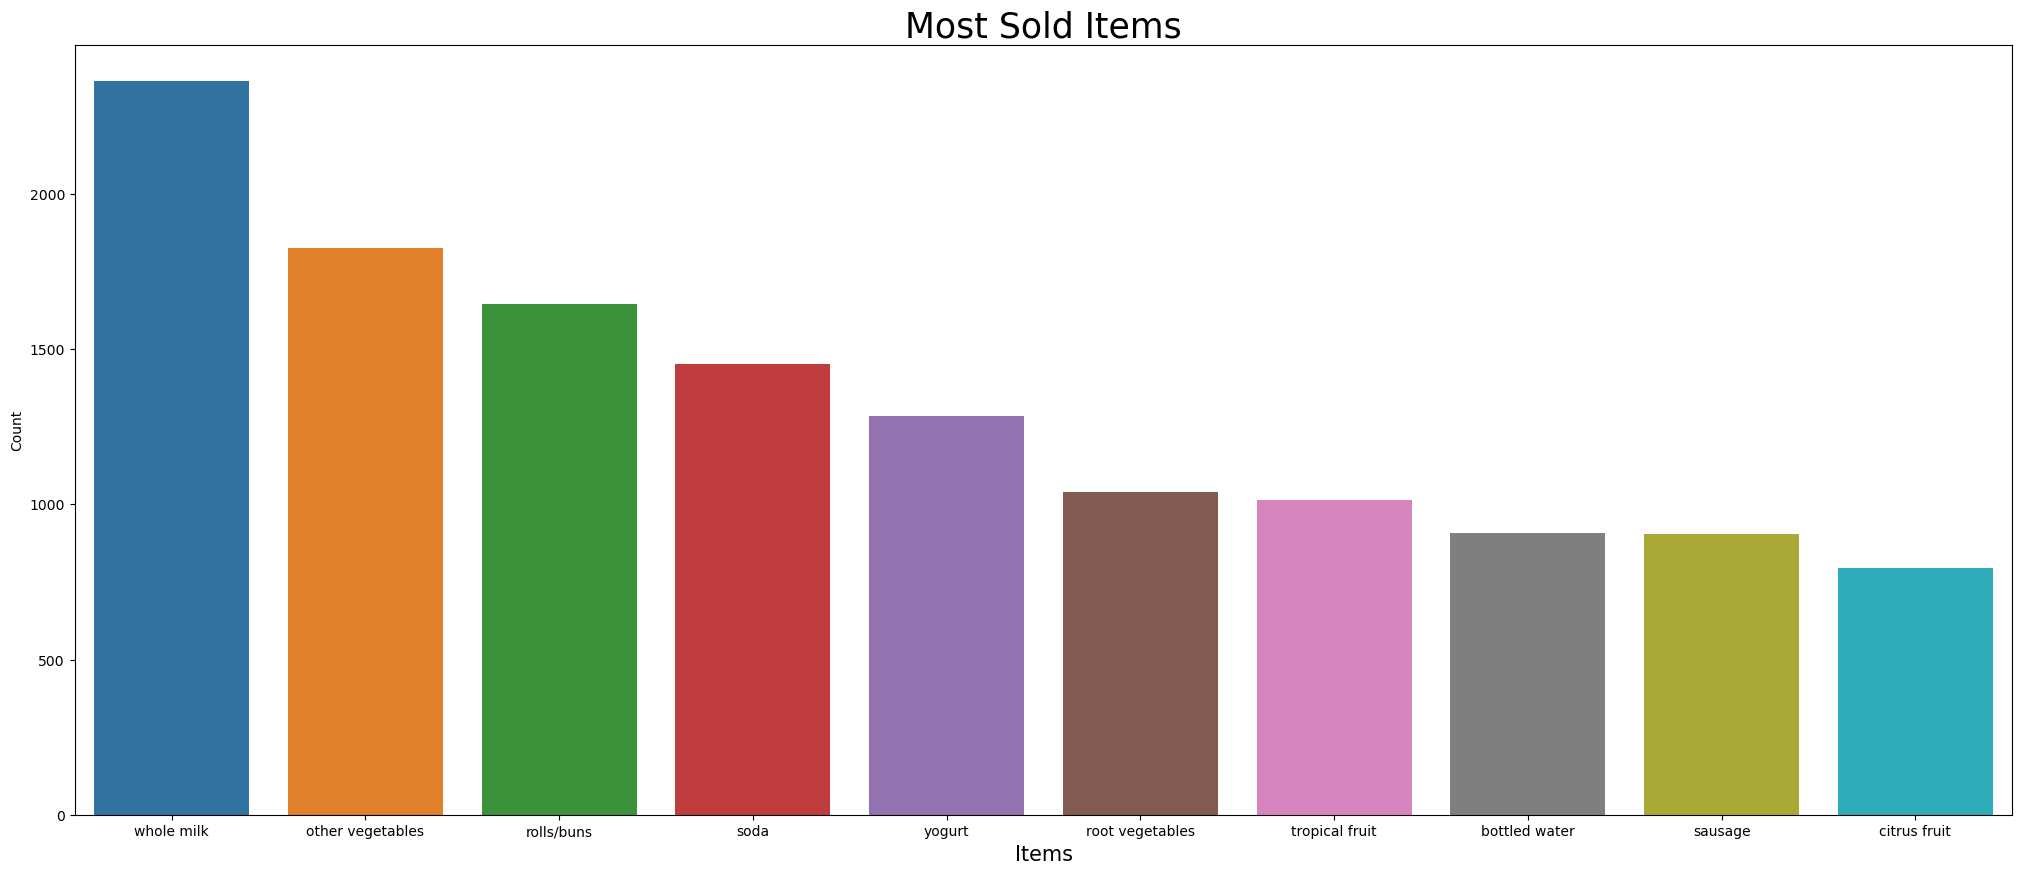

In [20]:
plt.figure(figsize = (25,10));
sns.countplot(x='itemDescription',  data=df, order = ['whole milk', 'other vegetables', 'rolls/buns', 'soda','yogurt'
,'root vegetables','tropical fruit', 'bottled water', 'sausage', 'citrus fruit'] );
plt.title("Most Sold Items", fontsize = 25)
plt.xlabel("Items", fontsize = 15)
plt.ylabel("Count")

plt.show()

GRAPH SHOWING TEN MOST POPULAR PRODUCT SOLD

In [21]:
df['itemDescription'].value_counts().nsmallest(10)

itemDescription
kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: count, dtype: int64

Value count of Ten least products sold

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


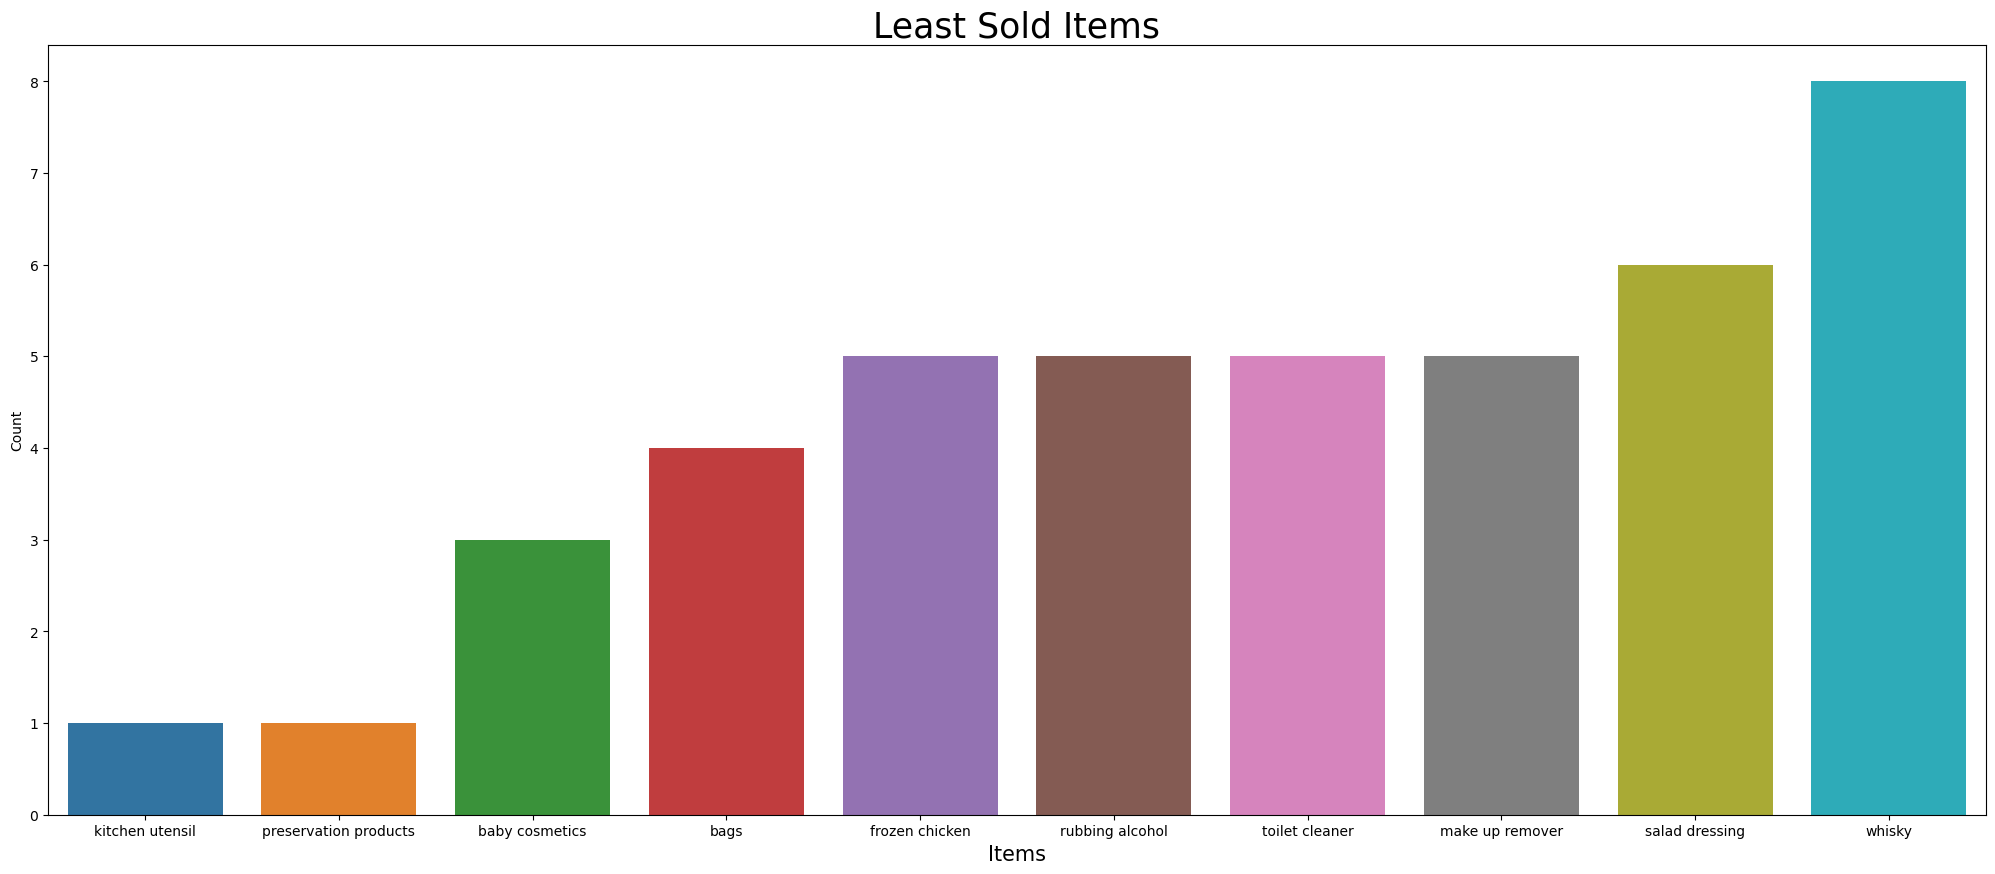

In [22]:
df['itemDescription'].value_counts().nsmallest(10)
plt.figure(figsize = (25,10));
sns.countplot(x='itemDescription',  data=df, order = ['kitchen utensil', 'preservation products', 'baby cosmetics', 'bags','frozen chicken'
,'rubbing alcohol','toilet cleaner', 'make up remover', 'salad dressing', 'whisky'] );
plt.title("Least Sold Items", fontsize = 25)
plt.xlabel("Items", fontsize = 15)
plt.ylabel("Count")
plt.show()

GRAPH SHOWING TEN LEAST SOLD PRODUCTS

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [25]:
# Sales trends over time (e.g., monthly sales)
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Total Sales')
print("Monthly Sales:\n", monthly_sales)

Monthly Sales:
     Year  Month  Total Sales
0   2014      1         1499
1   2014      2         1409
2   2014      3         1384
3   2014      4         1533
4   2014      5         1595
5   2014      6         1551
6   2014      7         1557
7   2014      8         1556
8   2014      9         1455
9   2014     10         1576
10  2014     11         1457
11  2014     12         1453
12  2015      1         1751
13  2015      2         1517
14  2015      3         1671
15  2015      4         1661
16  2015      5         1753
17  2015      6         1656
18  2015      7         1683
19  2015      8         1875
20  2015      9         1547
21  2015     10         1627
22  2015     11         1736
23  2015     12         1504


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


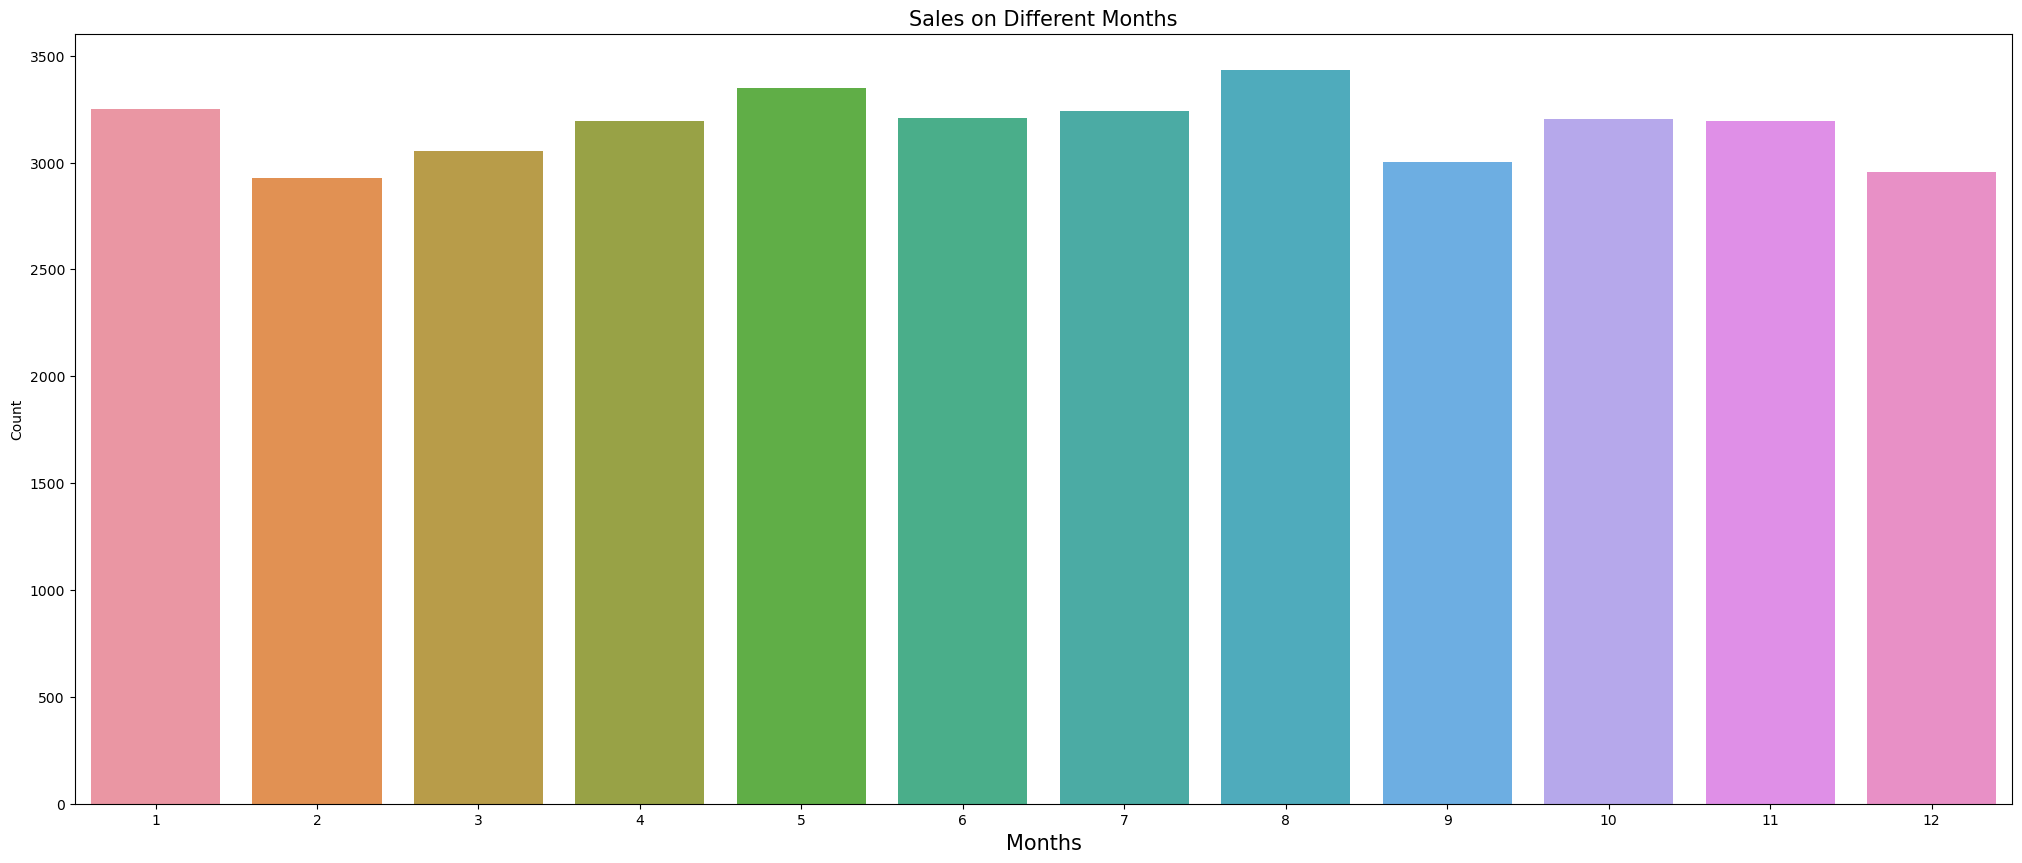

In [26]:
plt.figure(figsize = (25,10));
t = {'fontsize': 10}
sns.countplot(x='Month',  data=df );
plt.title("Sales on Different Months", fontsize = 15)
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Count")

plt.show()

SALES ON DIFFERENT MONTHS

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


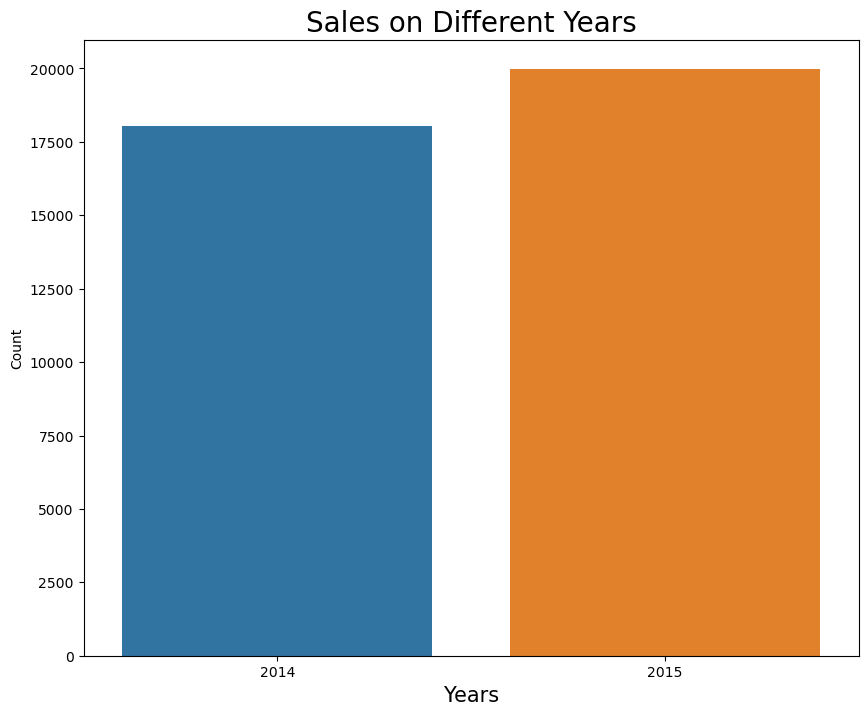

In [27]:
plt.figure(figsize = (10,8));
sns.countplot(x='Year',  data=df, );
plt.title("Sales on Different Years", fontsize = 20)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Count")

plt.show()

SALES ON DIFFERENT YEARS

THE HIGHEST SALES WAS RECORDED IN YEAR 2015

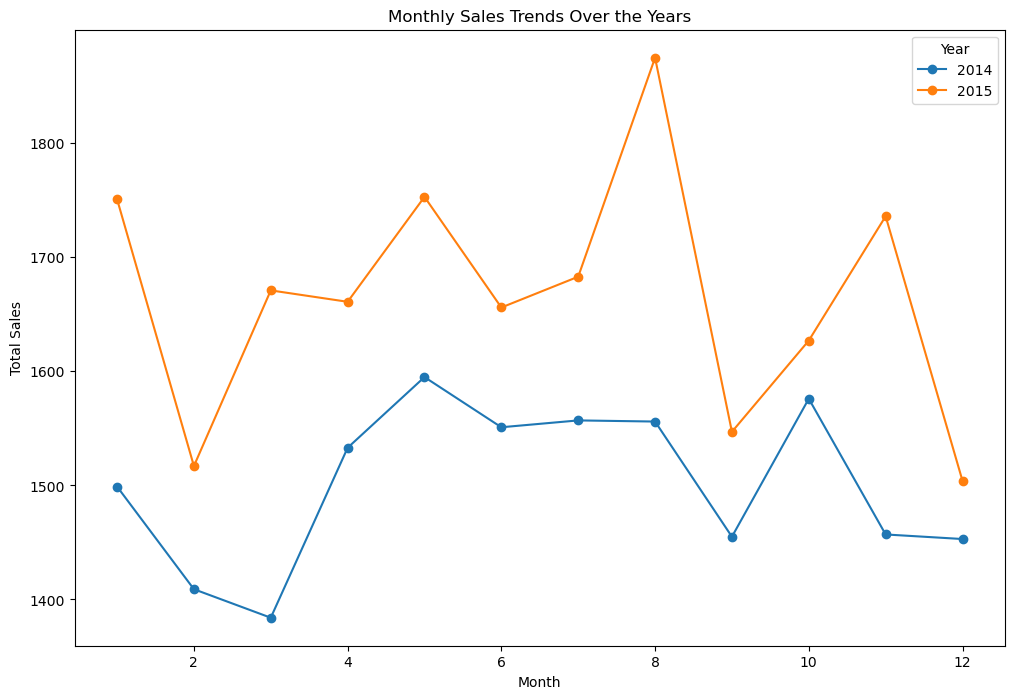

In [28]:
monthly_sales_plot = monthly_sales.pivot(index='Month', columns='Year', values='Total Sales')
monthly_sales_plot.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

MONTHLY SALES TREND OVER THE YEARS

In [29]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['itemDescription'], prefix='item')

df_encoded.head()

,Member_number,Date,Year,Month,Day,item_Instant food products,item_UHT-milk,item_abrasive cleaner,item_artif. sweetener,item_baby cosmetics,...,item_turkey,item_vinegar,item_waffles,item_whipped/sour cream,item_whisky,item_white bread,item_white wine,item_whole milk,item_yogurt,item_zwieback
0,1808,2015-07-21,2015,7,21,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,2015-01-05,2015,1,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,2015-09-19,2015,9,19,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,2015-12-12,2015,12,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,2015-02-01,2015,2,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Market Basket Analysis using Apriori Algorithm

In [30]:
#install the mlxtend library
!pip install mlxtend

In [31]:
# Convert the DataFrame to a transaction format
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')


In [32]:
# Convert the DataFrame to a Transaction format
transaction_data = df.groupby('Member_number')['itemDescription'].apply(list).reset_index(name='Transaction')
transactions = transaction_data['Transaction'].tolist()

In [33]:
# Association rule mining using Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Transform transactions into a transaction matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)


In [35]:
# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.1, use_colnames=True)

In [36]:
# Association rule mining
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

In [37]:
# Display association rules with support, confidence, and lift values
print("Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
            antecedents         consequents   support  confidence      lift
0      (bottled water)        (whole milk)  0.112365    0.525810  1.147597
1         (whole milk)     (bottled water)  0.112365    0.245241  1.147597
2   (other vegetables)        (rolls/buns)  0.146742    0.389646  1.114335
3         (rolls/buns)  (other vegetables)  0.146742    0.419663  1.114335
4               (soda)  (other vegetables)  0.124166    0.396072  1.051695
5   (other vegetables)              (soda)  0.124166    0.329700  1.051695
6   (other vegetables)        (whole milk)  0.191380    0.508174  1.109106
7         (whole milk)  (other vegetables)  0.191380    0.417693  1.109106
8   (other vegetables)            (yogurt)  0.120318    0.319482  1.129050
9             (yogurt)  (other vegetables)  0.120318    0.425204  1.129050
10              (soda)        (rolls/buns)  0.119805    0.382160  1.092928
11        (rolls/buns)              (soda)  0.119805    0.342627  1.092928
12   

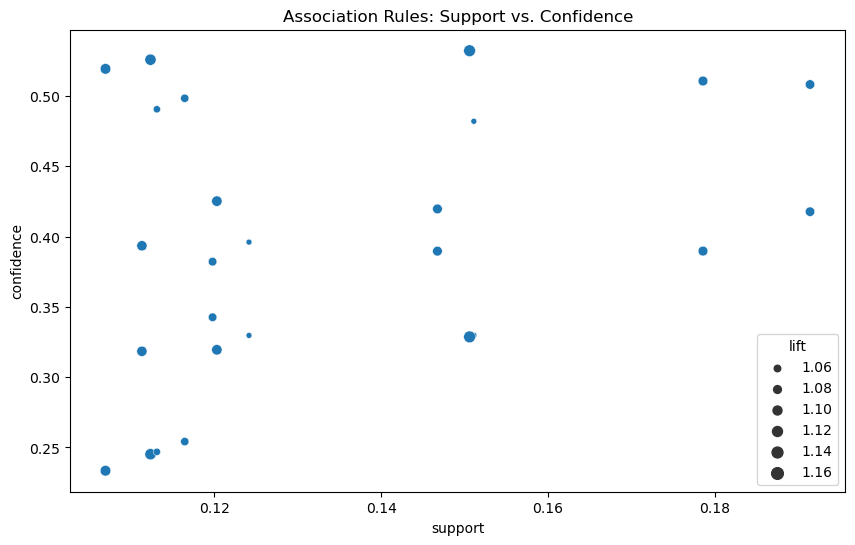

In [38]:
# Plotting a scatter plot of association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules)
plt.title('Association Rules: Support vs. Confidence')
plt.show()

EXPLANATION

Rule 0 states that when bottled water is purchased, whole milk is also purchased 14.67% of the time, with a confidence of 52.58%. This means that there is a moderate relationship between the items in the antecedent and the consequent, and that when bottled water is purchased, whole milk is also purchased around half of the time.

Rule 1 states that when whole milk is purchased, bottled water is also purchased 11.23% of the time, with a confidence of 24.52%. This means that there is a weak relationship between the items in the antecedent and the consequent, and that when whole milk is purchased, bottled water is purchased less than a quarter of the time.

Rule 2 states that when rolls/buns are purchased, other vegetables are also purchased 14.67% of the time, with a confidence of 41.97%. This means that there is a moderate relationship between the items in the antecedent and the consequent, and that when rolls/buns are purchased, other vegetables are also purchased around 41% of the time.

Rule 3 states that when other vegetables are purchased, rolls/buns are also purchased 14.67% of the time, with a confidence of 38.97%. This means that there is a moderate relationship between the items in the antecedent and the consequent, and that when other vegetables are purchased, rolls/buns are also purchased around 38% of the time. Based on this information, we can suggest that people who buy other vegetables might also be interested in buying rolls/buns.

Rule 4 states that when yogurt is purchased, other vegetables are also purchased 12.03% of the time, with a confidence of 31.95%. This means that there is a weak relationship between the items in the antecedent and the consequent, and that when yogurt is purchased, other vegetables are purchased less than a third of the time. Based on this information, we can suggest that people who buy yogurt might also be interested in other vegetables, but the relationship is not very strong.

Rule 5 states that when soda is purchased, other vegetables are also purchased 12.04% of the time, with a confidence of 32.00%. This means that there is a weak relationship between the items in the antecedent and the consequent, and that when soda is purchased, other vegetables are purchased less than a third of the time. Just like with rule 4, we can suggest that people who buy soda might also be interested in other vegetables, but the relationship is not very strong.

Rule 6 states that when whole milk is purchased, soda is also purchased 15.11% of the time, with a confidence of 48.20%. This means that there is a moderate relationship between the items in the antecedent and the consequent, and that when whole milk is purchased, soda is purchased nearly half of the time. Based on this information, we can suggest that people who buy whole milk might also be interested in b
uying soda.
Rule 7 states that when root vegetables are purchased, whole milk is also purchased 11.63% of the time, with a confidence of 50.86%. This means that there is a moderate relationship between the items in the antecedent and the consequent, and that when root vegetables are purchased, whole milk is purchased over half of the time. Based on this information, we can suggest that people who buy root vegetables are likely to also be interested in buying whole milk.

Rule 8 states that when rolls/buns are purchased, root vegetables are also purchased 14.67% of the time, with a confidence of 41.97%. This means that there is a moderate relationship between the items in the antecedent and the consequent, and that when rolls/buns are purchased, root vegetables are purchased over 40% of the time. Just like with previous rules, this suggests that people who buy rolls/buns might also be interested in buying root vegetables.

Rule 9 states that when yogurt is purchased, other vegetables are purchased 12.03% of the time, with a confidence of 42.52%. This rule suggests that people who buy yogurt are somewhat likely to also buy other vegetables. It's interesting to note that this rule has a relatively low confidence, which means that the relationship between yogurt and other vegetables is not particularly strong.

Rule 10 states that when rolls/buns are purchased, soda is purchased 11.83% of the time, with a confidence of 34.26%. This rule suggests that people who buy rolls/buns are somewhat likely to also buy soda, but the relationship is not particularly strong.

Rule 11 states that when rolls/buns are purchased, yogurt is purchased 11.13% of the time, with a confidence of 39.35%. This rule suggests that people who buy rolls/buns are somewhat likely to also buy yogurt, but the relationship is not particularly strong. So far, we've seen several rules that have moderate to weak relationships between the different items.

Rule 12 states that when whole milk is purchased, root vegetables are purchased 11.31% of the time, with a confidence of 24.69%. This rule suggests that people who buy whole milk are somewhat likely to also buy root vegetables, but the relationship is not very strong. This seems to mirror the relationships we've seen in previous rules.

Rule 13 states that when root vegetables are purchased, whole milk is purchased 11.31% of the time, with a confidence of 49.05%. This rule suggests that people who buy root vegetables are somewhat likely to also buy whole milk, and the relationship is moderate. It's interesting that this relationship is stronger than some of the other relationships we've seen, such as the relationship between rolls/buns and soda.

Rule 14 states that when yogurt is purchased, rolls/buns are purchased 11.13% of the time, with a confidence of 39.34%. This rule suggests that people who buy yogurt are somewhat likely to also buy rolls/buns, and the relationship is moderate. This pattern seems to follow the trend we've seen with other rules.

Rule 15 states that when rolls/buns are purchased, whole milk is purchased 11.31% of the time, with a confidence of 49.05%. This rule suggests that people who buy rolls/buns are somewhat likely to also buy whole milk, and the relationship is moderate.

Rule 16, which states that when root vegetables are purchased, yogurt is purchased 11.31% of the time, with a confidence of 49.05%. This rule suggests that people who buy root vegetables are somewhat likely to also buy yogurt, and the relationship is moderate. So far, we've seen that most of the relationships between the items in the table are moderate, with some being slightly stronger or weaker than others.

Rule 17 states that when whole milk is purchased, yogurt is purchased 11.13% of the time, with a confidence of 39.34%. This rule suggests that people who buy whole milk are somewhat likely to also buy yogurt, and the relationship is moderate. This rule is similar to rule 15, but with a slightly weaker relationship.

Rule 18: When sausage is purchased, whole milk is purchased 10.70% of the time, with a confidence of 52.93%. So when someone buys sausage, they're somewhat likely to also buy whole milk.

Rule 19 states that when soda is purchased, whole milk is purchased 15.11% of the time, with a confidence of 48.20%. This rule suggests that someone who buys soda is somewhat likely to also buy whole milk.

Rule 20 states that when tropical fruit is purchased, whole milk is purchased 11.65% of the time, with a confidence of 49.83%. This rule suggests that someone who buys tropical fruit is somewhat likely to also buy whole milk.

Rule 21 states that when yogurt is purchased, whole milk is purchased 15.09% of the time, with a confidence of 53.22%. This rule suggests that someone who buys yogurt is somewhat likely to also buy whole milk.

Rule 22 states that when whole milk is purchased, yogurt is purchased 15.09% of the time, with a confidence of 53.22%. This rule suggests that someone who buys whole milk is somewhat likely to also buy yogurt.

Rule 23 states that when yogurt is purchased, tropical fruit is purchased 11.64% of the time, with a confidence of 49.83%. This rule suggests that someone who buys yogurt is somewhat likely to also buy tropical fruit.

Rule 24: When tropical fruit is purchased, soda is purchased 11.64% of the time, with a confidence of 49.83%. This rule suggests that someone who buys tropical fruit is somewhat likely to also buy soda.

Rule 25: When soda is purchased, rolls/buns are purchased 15.11% of the time, with a confidence of 48.20%. This rule suggests that someone who buys soda is somewhat likely to also buy rolls/buns.

CONCLUSION
Based on all 25 rules, it appears that there are some common purchases that people tend to make. For example, there seems to be a trend where people who buy one type of food item are also likely to buy another specific type of food item. Some of the most common combinations include: whole milk and yogurt, tropical fruit and soda, and rolls/buns and soda. These trends could be useful for marketing and sales purposes.
The rules we've looked at so far show that there are some common buying patterns among consumers. It's possible that these patterns are due to factors like taste preferences, meal planning, or convenience. 

SUGGESTIONS 
Businesses could use these buying patterns to offer related products to their customers, or to place products together in stores to make them more accessible.
